In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

plt.style.use('ggplot')

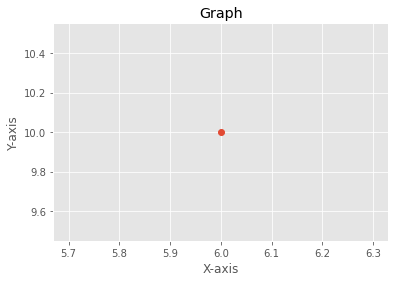

In [2]:
plt.plot(6,10,'o')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.title('Graph')
plt.show()   # will produce a new image with above labels and axis names. 

Cleaning of the excel file

In [3]:
df=pd.read_excel(r"C:\Users\sanju\OneDrive\Desktop\Coursera_Data Viz\Canada.xlsx",        #Reading the excel file
                sheet_name='Canada by Citizenship',
                skiprows=range(20),
                skipfooter=2)
df['Total']=df.iloc[0:195,10:44].sum(axis=1,skipna=True)     #Adding total no of immigrants from each country (1980-2013) (For specific columns)
df.drop(['Type','Coverage','AREA','REG','RegName','DEV','DevName'],axis=1,inplace=True) #Droping columns
df.rename(columns={'OdName':'Origin_Country', 'AreaName': 'Continent'}, inplace=True)  #Renaming columns and index labels
df.set_index('Origin_Country',inplace=True)      # setting origin_country column as index
df.rename(index= {'United Kingdom of Great Britain and Northern Ireland': 'UK_NI', 'United States of America': 'USA', 'Iran (Islamic Republic of)': 'Iran', 'Republic of Korea': 'ROK'} ,inplace=True)
df.columns = list(map(str, df.columns))          # converting the column labels into strings: '1980' to '2013'.
all(isinstance(column,str)for column in df.columns)   # return True if all column labels are of str type
years = list(map(str, range(1980, 2014)))        # creating a list for number from 1980 to 2014
df


,Continent,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Origin_Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,16,39,39,47,71,340,496,741,828,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
Albania,Europe,1,0,0,0,0,0,1,2,2,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,80,67,71,69,63,44,69,132,242,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
American Samoa,Oceania,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,0,0,0,0,0,0,2,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,1191,1829,2162,3404,7583,5907,2741,1406,1411,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,95955
Western Sahara,Africa,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,1,2,1,6,0,18,7,12,7,...,161,140,122,133,128,211,160,174,217,2984


India imigration data visualization:

.plot()

.xlabel()

.ylabel()

.title()

.text(x, y, label)- Allows us to write on the graph. x and y denotes the X/Y-axis pos. 

    plt.text(2008,28000,'Global Economic Crisis') 
        since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 28000.
        If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 28th index is year 2008 since it is the 20th year with a base year of 1980.  
    plt.text(2008,28000,'Global Economic Crisis')

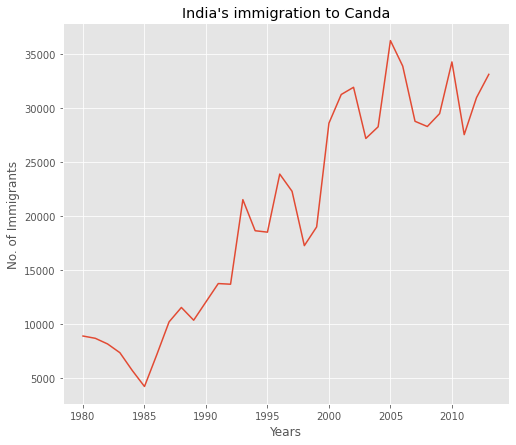

In [4]:
df.loc['India',years].plot(kind='line',figsize=(8,7))
plt.title('India\'s immigration to Canda')
plt.xlabel('Years')
plt.ylabel('No. of Immigrants')

#plt.text(2008,28000,'Global Economic Crisis')

plt.show()

Comparing India and Pakistan immigration. 

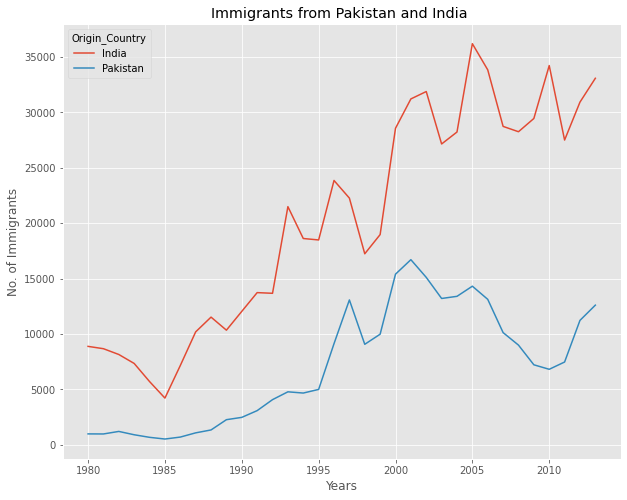

In [5]:
df_IP=df.loc[['India','Pakistan'],years]   # storing the data of these country in a new dataframe

df_ip=df_IP.transpose()       # swapping rows(indices) and columns. 
df_ip.plot(kind='line',figsize=(10,8))       # pass a tuple (x, y) size
plt.xlabel('Years')
plt.ylabel('No. of Immigrants')
plt.title('Immigrants from Pakistan and India ')
plt.show()

Comparing Immigration data of top 5 nations. 

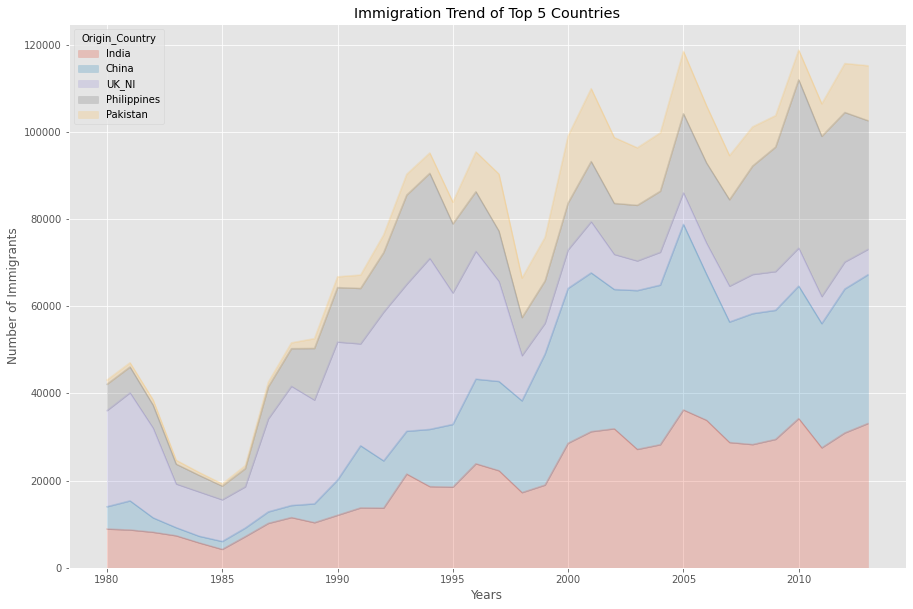

In [6]:
df_top5 = df.sort_values(by='Total',axis=0,ascending=False,inplace=True)  # sorting them by total column(Total no of immigrants)
df_top5=df.head(5)
df_top5=df_top5[years].transpose()   # swappig rows and columns

'''Scripting layer (procedural method) - using matplotlib.pyplot as 'plt'''
# producing stacked area plots(default)
df_top5.plot(kind='area',
            alpha=0.25,         # transparent level (0 - 1, default value alpha = 0.5)
            figsize=(15,10))    # passing a tuple (x, y) size  

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

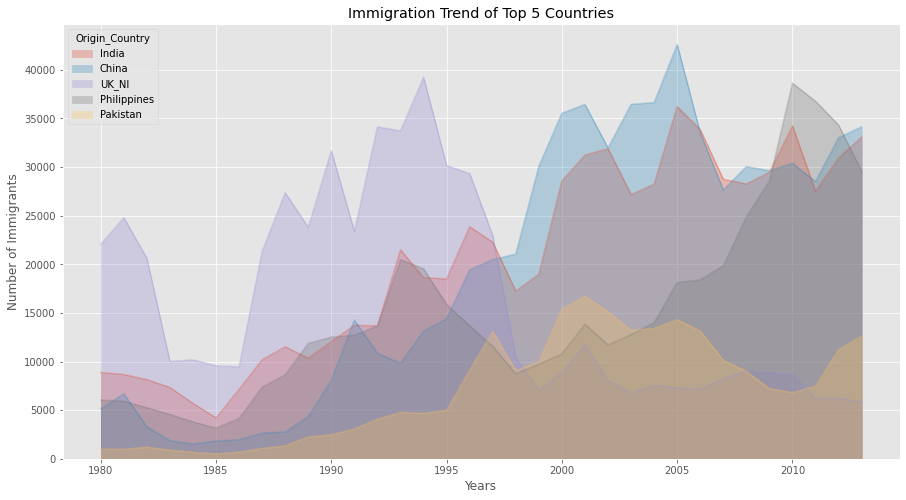

In [7]:
# OOP approach to plot (PREFERRED) 
'''Artist layer (Object oriented method) - using an Axes instance from Matplotlib '''
# Generating ustacked area plots.
ax=df_top5.plot(kind='area',
            stacked=False,
            alpha=0.30,
            figsize=(15,8))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
plt.show()

HISTOGRAM

Text(0, 0.5, 'Number of Countries')

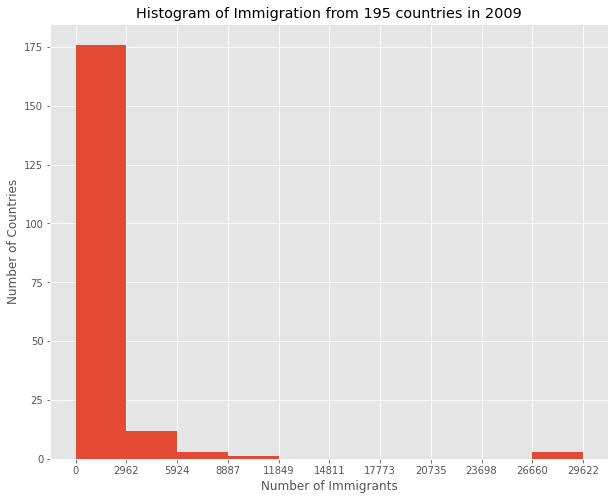

In [8]:
# Frequency distribution of frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2009

tot, bin_edge= np.histogram(df['2009'])  # using this fucntion to solve bin width inconsistency
#print(tot) # frequency count
#print(bin_edge) # bin ranges (By default, the histrogram method breaks up the dataset into 10 bins)

# passing plot_type as method
ax=df['2009'].plot.hist(    
                    figsize=(10,8),
                    xticks= bin_edge ) # setting X-axis tick values as bin widths

ax.set_title('Histogram of Immigration from 195 countries in 2009')  
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')  


[Text(0.5, 0, 'Number of Immigrants'),
 Text(0, 0.5, 'Number of Years'),
 Text(0.5, 1.0, 'Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')]

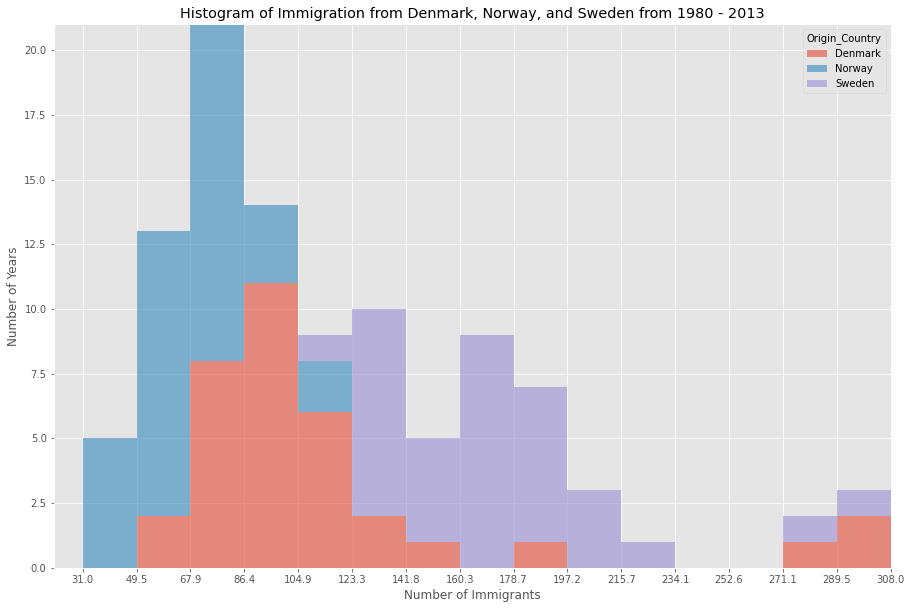

In [9]:
# immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013

df_dns=df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns=df_dns.transpose()

count,bin_edge=np.histogram(df_dns,15) # passing 15 bins as arguments (bin_edge must be 2nd variable)

xmin=bin_edge[0]-10         # setting x-axis length limit 
xmax=bin_edge[len(bin_edge)-1]

ax=df_dns.plot.hist(figsize=(15,10),
                    bins=15,            # passing bin value 15 as argument.(if not passed then, bin width will be mismatched wd xticks as bin widths have been assigned to xticks )
                    xticks=bin_edge,
                    stacked=True,       # plots are not stacked to each other(default false or overlapping)
                    alpha=0.6,
                    xlim=(xmin, xmax))

# instead of writting properties if axes separately, we can put them together as arguments. 
ax.set(xlabel='Number of Immigrants', ylabel= 'Number of Years', title= 'Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 


BAR CHART

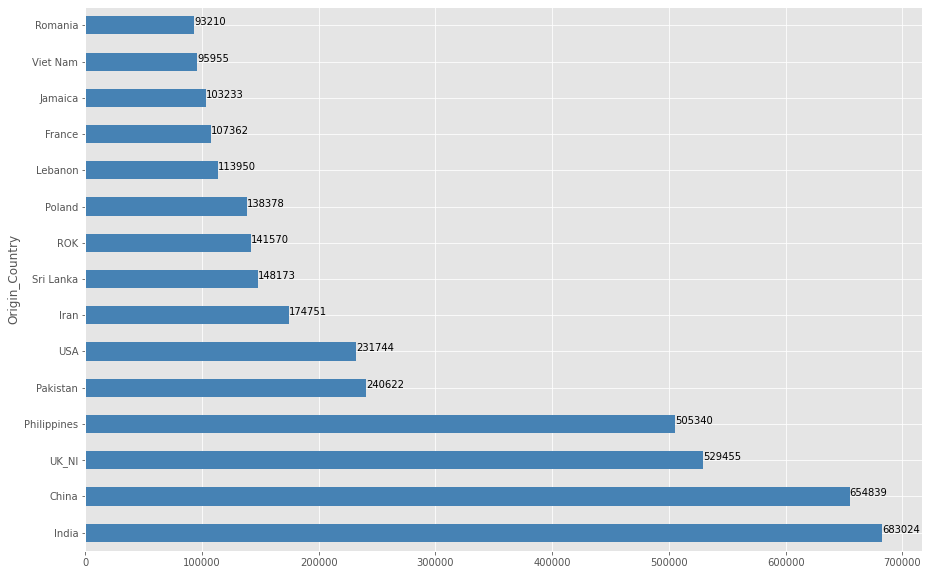

In [10]:
# Horizontal bars
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_15=df['Total'].head(15)

df_15.plot.barh(figsize=(15,10), color='steelblue')

for index, value in enumerate(df_15): 
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(value, xy=(value , index ))  # by trial-error annoted value can be shifted inside the bar.

plt.show()

BAR CHART

(-1.1088256922156103,
 1.1004202711684166,
 -1.1779087919998101,
 1.1132220192995343)

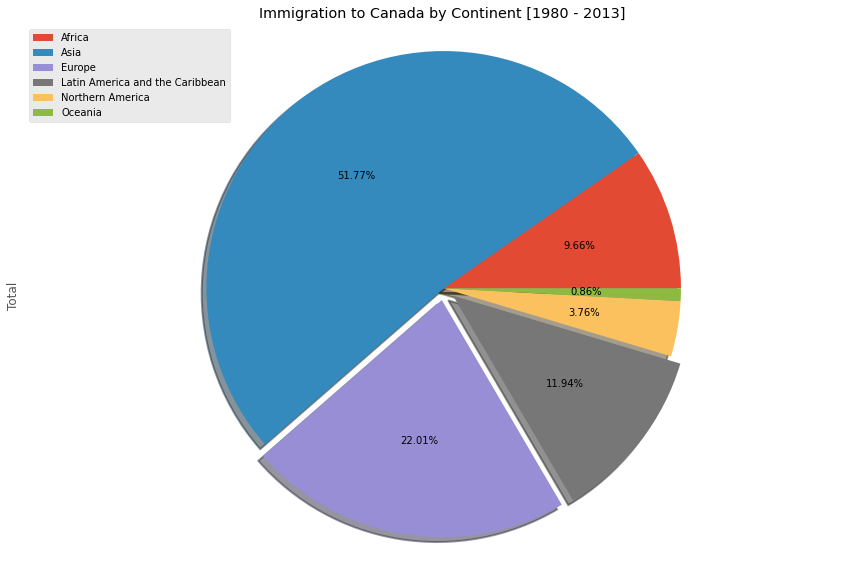

In [11]:
# proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

df_cont= df.groupby('Continent')[years].sum()  # grouping by continent and adding total immigration each year.
df_cont['Total']=df_cont.sum(axis=1)           # adding total column.

plt.figure(facecolor='white')
df_cont['Total'].plot.pie( figsize=(15,10),
                          labels= None, 
                          autopct= '%1.2f%%',
                          shadow= True,
                          explode= [0,0,0.05,0.05,0,0],
                          wedgeprops= {'linewidth': 2, 'linestyle': '-'}
                          )

plt.legend(labels=df_cont.index, loc='upper left')

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.


(-1.1136261591673444,
 1.1124006589207691,
 -1.1496652497690054,
 1.1154216332937972)

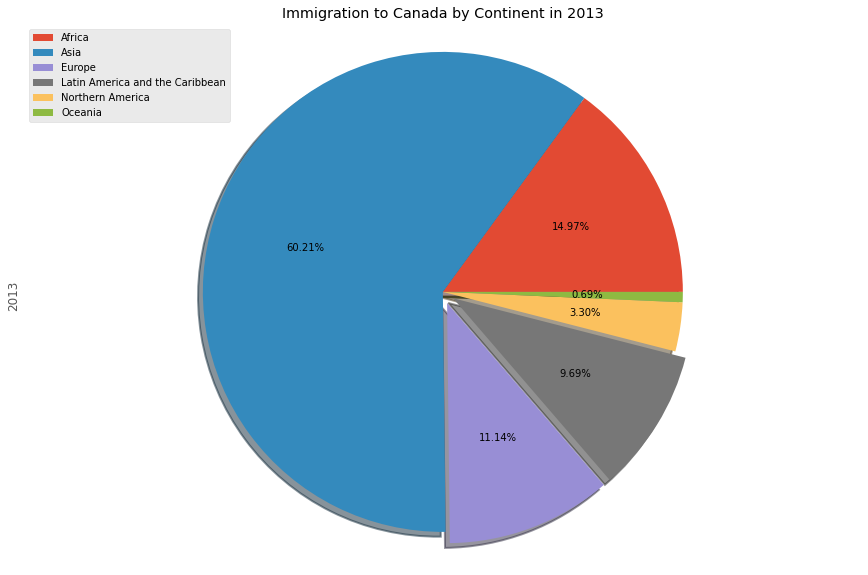

In [12]:
# proportion (percentage) of new immigrants grouped by continents in the year 2013.

df_cont= df.groupby('Continent')[years].sum()
df_cont=df_cont.loc[:,'2013']
plt.figure(facecolor= 'white', figsize=(15,10))

df_cont.plot.pie(labels= None, 
                          autopct= '%1.2f%%',
                          shadow= True,
                          explode= [0,0,0.05,0.05,0,0],
                          wedgeprops= {'linewidth': 2, 'linestyle': '-'}
                          )

plt.legend(labels=df_cont.index, loc='upper left')

plt.title('Immigration to Canada by Continent in 2013')
plt.axis('equal') # Sets the pie chart to look like a circle.


**BOX PLOT**: 

   Way of statistially representing the distribution of data. 
   
   Extremly useful for describing center, variablity of data and detecting outliers. 

Text(0, 0.5, 'Number of Immigrants')

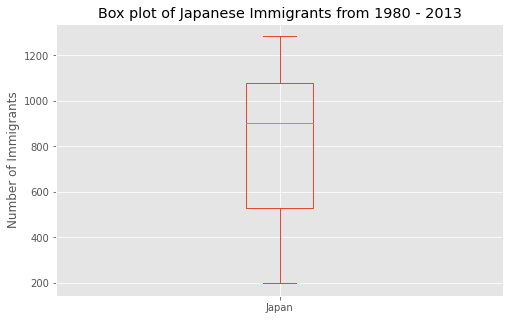

In [13]:
# plot the box plot for the Japanese immigrants between 1980 - 2013.
df_japan = df.loc[['Japan'],years].transpose()    # to get a dataframe, put extra bracket around index labels. if not, then it will be produced as series. 

df_japan.plot.box(figsize = (8,5))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')


In [14]:
df_japan.describe()   # applying describe method to get a summuary report on japan immigrants dataframe. it can be compared with the box plot produced above.

Origin_Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Text(0, 0.5, 'Number of Immigrants')

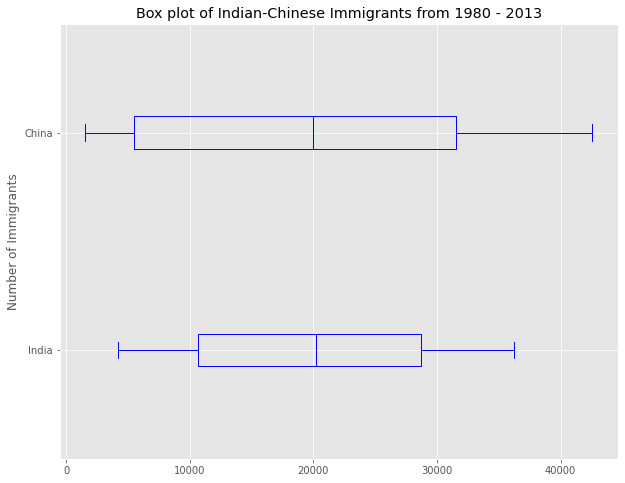

In [15]:
# Comparing the distribution of the number of new immigrants from India and China for the period 1980 - 2013.
df_IC = df.loc[['India', 'China'], years].transpose()
df_IC.plot.box( figsize = (10,8), color='blue', vert = False)    # generating a horizontal box plot

plt.title('Box plot of Indian-Chinese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

In [16]:
df_IC.describe()

Origin_Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


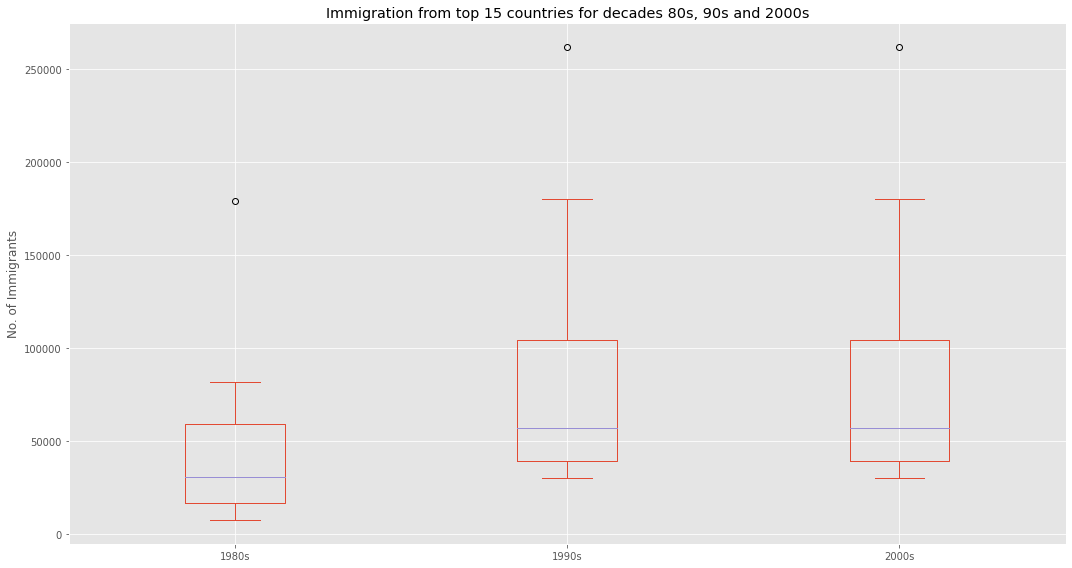

In [17]:
# box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s

d1 = list(map(str, range(1980,1990)))
d2 = list(map(str, range(1990,2000)))
d3 = list(map(str, range(2000,2010)))

df_top15 = df.head(15)

df_80s = df_top15.loc[: , d1]
df_80s['1980s'] = df_80s.sum(axis= 1)
df_80s.sort_values(by = '1980s', ascending= False, inplace= True)
df_80s = df_80s.head(15)
df_80s = df_80s[['1980s']]

df_90s = df_top15.loc[: , d2]
df_90s['1990s'] = df_90s.sum(axis= 1)
df_90s.sort_values(by = '1990s', ascending= False, inplace= True)
df_90s = df_90s.head(15)
df_90s = df_90s[['1990s']]

df_00s = df_top15.loc[: , d3]
df_00s = df.loc[: , d2]
df_00s['2000s'] = df_00s.sum(axis= 1)
df_00s.sort_values(by = '2000s', ascending= False, inplace= True)
df_00s = df_00s.head(15)
df_00s = df_00s[['2000s']]

df_new = pd.concat([df_80s, df_90s, df_00s], axis=1)

df_new.plot.box(figsize = (15,8))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.ylabel('No. of Immigrants')
plt.tight_layout()

**SUBPLOTS**
* Can be done in :
   * ```python
      fig = plt.figure() # create figure
      ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
     ```
     *   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols`.
     ```
   * ```python
      fig = plt.figure() # create figure
      ax = fig.subplots(nrows, ncols) # create subplots
     ```
* We can also specify on which subplot to place each plot by passing in the `ax` paramemter in `plot()` method.

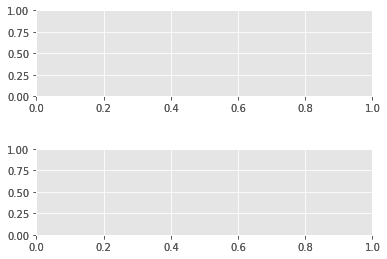

In [18]:
fig = plt.figure()

# using add_subplot() method
ax = fig.add_subplot(211) # == (2,1,1)
ax = fig.add_subplot(212) # == (2,1,2)

# using subplots() method
ax = fig.subplots(2,1)

plt.tight_layout()


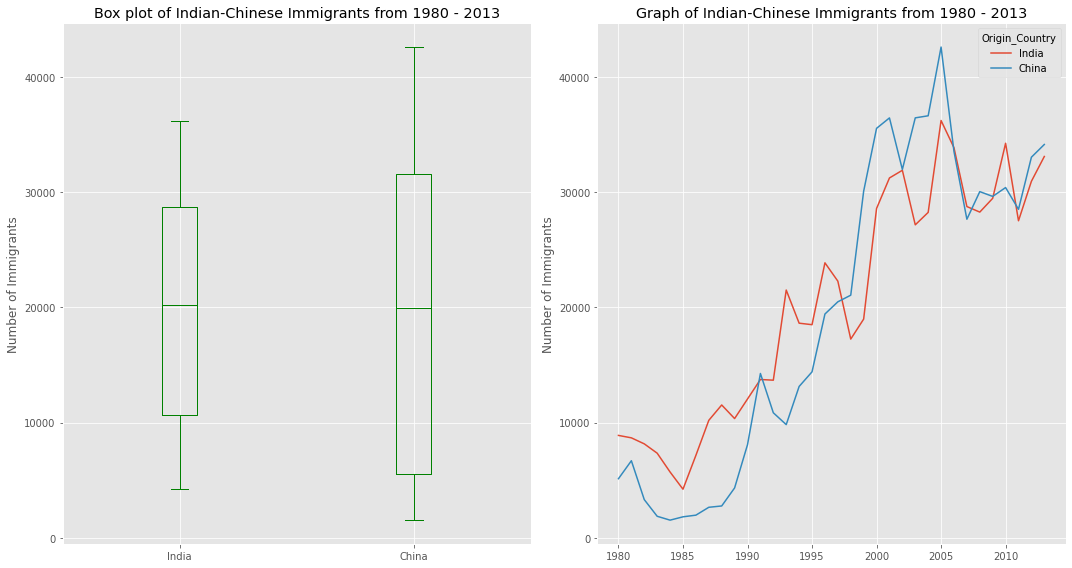

In [19]:
fig = plt.figure( figsize = (15,8) )

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df_IC.plot.box( color= 'green', ax= ax1)
ax1.set_ylabel('Number of Immigrants')
ax1.set_title('Box plot of Indian-Chinese Immigrants from 1980 - 2013')

df_IC.plot.line(ax= ax2)
ax2.set_ylabel('Number of Immigrants')
ax2.set_title('Graph of Indian-Chinese Immigrants from 1980 - 2013')

plt.tight_layout()

**SCATTER PLOTS**

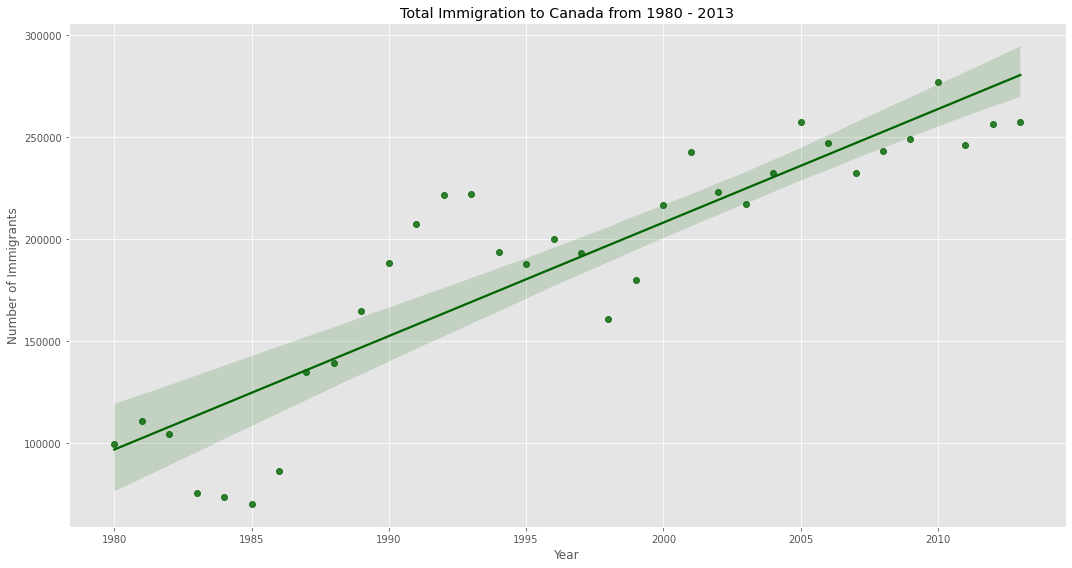

In [20]:
# trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

tot = df[years].sum(axis=0)
df_tot = pd.DataFrame(tot)
df_tot.index = map(int, df_tot.index)

df_tot.reset_index(inplace=True)
df_tot.rename(columns={ 0 : 'Total', 'index' : 'Year'}, inplace= True)

fig = plt.figure( figsize = (15,8) )

#df_tot.plot.scatter(x = 'Year', y = 'Total', figsize = (15,8), color='green')
ax = sns.regplot( x = 'Year', y = 'Total', data= df_tot, color= 'darkgreen')         # using seaborn regplot to plot regression line 
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.tight_layout()

* We can mathematically analyze this upward trend using a regression line (line of best fit).

* Plotting a linear line of best fit.

    Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:

    *   `x`: x-coordinates of the data.
    *   `y`: y-coordinates of the data.
    *   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.


In [21]:
fit = np.polyfit(x = df_tot['Year'], y = df_tot['Total'], deg = 1)
fit 

# The output is an array with the polynomial coefficients, highest powers first. 
# Since we are plotting a linear regression y= a * x + b, our output has 2 elements [5.56709228e+03, -1.09261952e+07],
# with the the slope in position 0 and intercept in position '''

array([ 5.56709228e+03, -1.09261952e+07])

'No. Immigrants = 5567 * Year + -10926195'

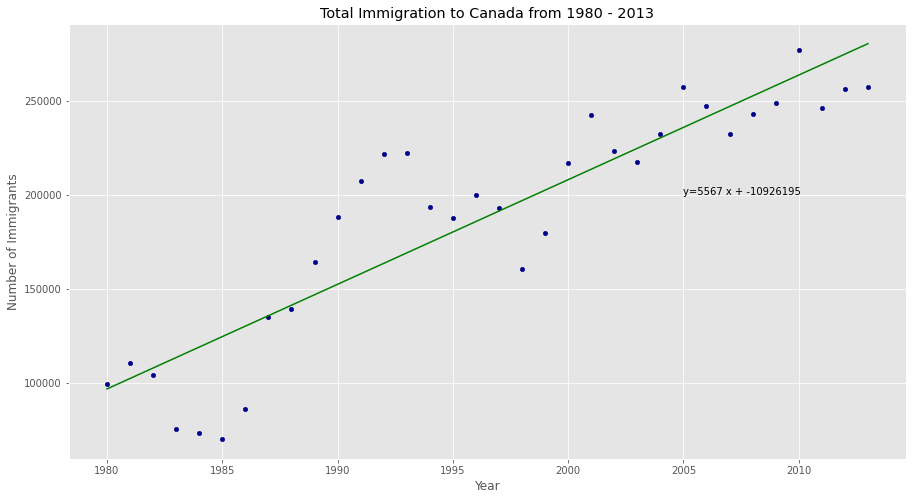

In [22]:
# plotting a regression line.
df_tot.plot.scatter(x = 'Year', y = 'Total', figsize = (15,8), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
x = df_tot['Year']
plt.plot( x, fit[0] * x + fit[1], color='green')

plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2005, 200000))

# print out the line of best fit (the eq.)
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

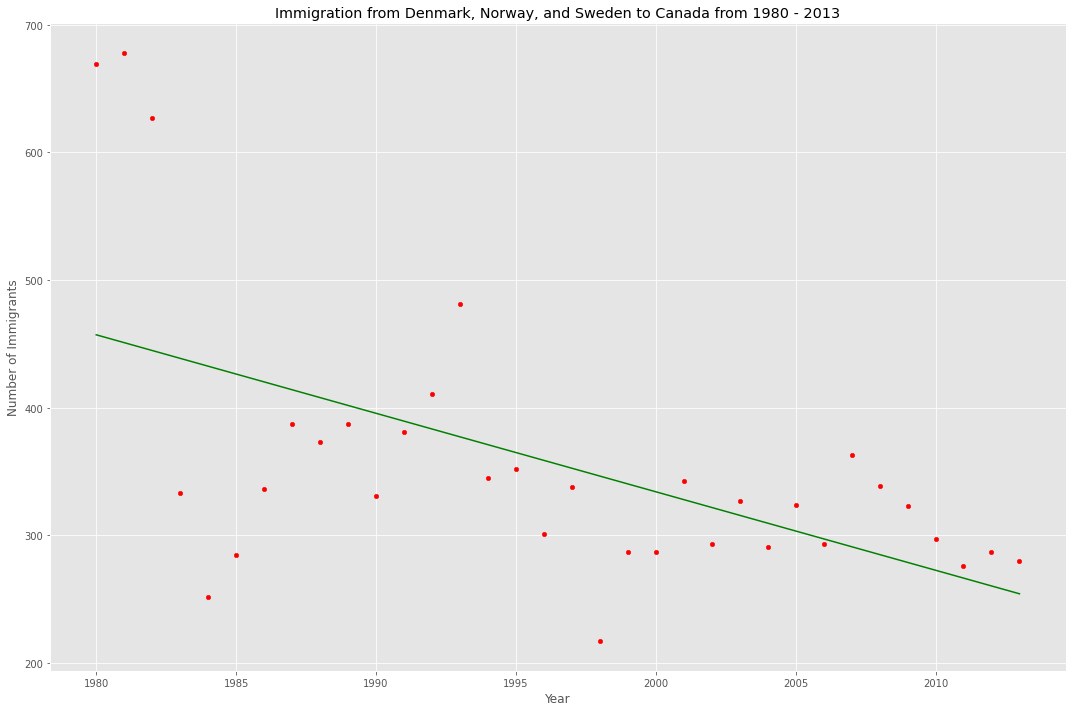

In [23]:
# Scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013

df_dns_new = pd.DataFrame( df_dns.sum(axis = 1))
df_dns_new.reset_index(inplace = True)
df_dns_new['index'] = df_dns_new['index'].astype(int)
df_dns_new.rename(columns={ 'index' : 'Year', 0 : 'Total' }, inplace= True)

df_dns_new.plot.scatter( x = 'Year', y = 'Total', figsize = (15,10), color = 'red')

plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plotting a regression line.
fit = np.polyfit(x = df_dns_new['Year'], y = df_dns_new['Total'], deg = 1)
fit 
plt.plot( x, fit[0] * x + fit[1], color='green')

plt.tight_layout()

**REGRESSION PLOTS**

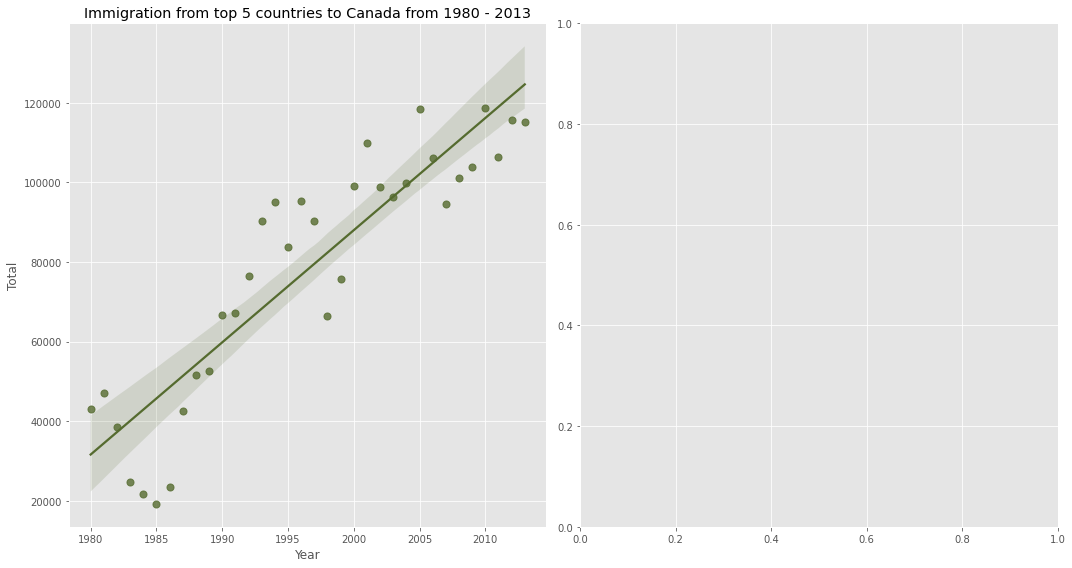

In [24]:
dff = df_top5.sum(axis=1)
dff_new = pd.DataFrame(data= dff)
dff_new.reset_index(inplace= True)
dff_new.rename( columns= { 'index': 'Year', 0: 'Total'}, inplace= True)
dff_new['Year'] = dff_new['Year'].astype(int)

fig = plt.figure( figsize = (15,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot( x = 'Year', y = 'Total', data= dff_new, color = 'darkolivegreen', ax = ax1, scatter_kws= { 's': 50 })   # passing the axes object to specify in which subplot to plot
ax1.set_title('Immigration from top 5 countries to Canada from 1980 - 2013')

plt.tight_layout()
plt.show()

**FOLIUM**

In [25]:
# Creating a map object
map = folium.Map(location = [28.644800, 77.216721], zoom_start= 10, max_zoom = 13, min_zoom = 9)   # Delhi
# Rendering the map
map

In [26]:
map = folium.Map(location = [28.644800, 77.216721], 
                zoom_start= 10, 
                max_zoom = 15, 
                min_zoom = 9, 
                tiles = 'Stamen Terrain'
                )  
map

**MARKERS IN MAPS**

In [27]:
# Visualizing Crime in SF
df = pd.read_excel(r"C:\Users\sanju\OneDrive\Desktop\Coursera_Data Viz\Police_Department_Incidents_-_Previous_Year__2016_.xlsx")
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,2016-05-01 00:00:00,23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,2016-01-01 00:00:00,00:30:00,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [28]:
df_incidents = df.iloc[ 0:100, : ]  # only the first 100 incidents
df_incidents.tail()         

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
95,160014858,OTHER OFFENSES,"FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR P...",Wednesday,2016-06-01 00:00:00,06:00:00,TARAVAL,NONE,2000 Block of 29TH AV,-122.486926,37.749084,"(37.7490841729028, -122.486925960114)",16001485809024
96,160015163,NON-CRIMINAL,AIDED CASE,Wednesday,2016-06-01 00:00:00,16:09:00,MISSION,NONE,14TH ST / FOLSOM ST,-122.415616,37.768536,"(37.7685360123583, -122.41561633832)",16001516351040
97,160015276,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Tuesday,2016-05-01 00:00:00,20:00:00,PARK,NONE,1000 Block of COLE ST,-122.449752,37.764430,"(37.7644297714074, -122.449751652563)",16001527605073
98,160015276,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Tuesday,2016-05-01 00:00:00,20:00:00,PARK,NONE,1000 Block of COLE ST,-122.449752,37.764430,"(37.7644297714074, -122.449751652563)",16001527606224
99,160015282,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,2016-05-01 00:00:00,17:00:00,TARAVAL,NONE,0 Block of ARDENWOOD WY,-122.472716,37.735268,"(37.7352681469084, -122.472715759631)",16001528206244


In [29]:
# Generating map of SF
sf_map = folium.Map( location= [37.77, -122.42], zoom_start = 12)
sf_map

In [30]:
# Marking the crime spots

for i,(lat,long) in enumerate(zip( df_incidents.Y, df_incidents.X)): 
    folium.Marker(
        location = [lat,long],
        popup = df_incidents['Category'].iloc[i],     # labelling each crime spot with crime category
        icon = folium.Icon( icon = 'glyphicon-warning-sign',
                            color = 'red'  
                            )
    ).add_to(sf_map)

sf_map

In [31]:
# Circling each crime spot
for i,(lat,long) in enumerate(zip( df_incidents.Y, df_incidents.X)): 
    folium.CircleMarker(
        location = [lat,long],
        color = 'yellow',
        popup = df_incidents['Category'].iloc[i],     # labelling each crime spot with crime category
        icon = folium.Icon( icon = 'glyphicon-warning-sign',
                            color = 'red'  
                            ),
        radius = 10,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(sf_map)

sf_map

In [32]:
sanfran_map = folium.Map( location= [37.77, -122.42], zoom_start = 12)

marker_cluster = MarkerCluster().add_to(sanfran_map)

for i,(lat,long) in enumerate(zip( df_incidents.Y, df_incidents.X)): 
    folium.CircleMarker(
        location = [lat,long],
        color = 'yellow',
        popup = df_incidents['Category'].iloc[i],     # labelling each crime spot with crime category
        radius = 10,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(marker_cluster)

sanfran_map

**CHOROPLETH MAP**

In [34]:
df=pd.read_excel(r"C:\Users\sanju\OneDrive\Desktop\Coursera_Data Viz\Canada.xlsx",        #Reading the excel file
                sheet_name='Canada by Citizenship',
                skiprows=range(20),
                skipfooter=2)
df['Total']=df.iloc[0:195,10:44].sum(axis=1,skipna=True)     #Adding total no of immigrants from each country (1980-2013) (For specific columns)
df.drop(['Type','Coverage','AREA','REG','DEV'],axis=1,inplace=True) #Droping columns
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df.columns = list( map(str, df.columns))
df

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15698
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,95955
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2984
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1666


And now to create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1.  `geo_data`, which is the GeoJSON file.
2.  `data`, which is the dataframe containing the data.
3.  `columns`, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4.  `key_on`, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, **name** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.


In [38]:
# Adding the world GeoJSON FILE
world_geo = gpd.read_file(r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json')


# Creating a world map centered around [0, 0] as latitude and longitude values
world_map = folium.Map( location= [0,0], zoom_start= 2)

world_map.choropleth (
                    geo_data = world_geo ,
                    data = df,
                    columns=['Country', 'Total'],
                    key_on='feature.properties.name',
                    fill_color='YlOrRd', 
                    fill_opacity=0.7, 
                    line_opacity=0.2,
                    legend_name='Immigration to Canada'
                )
world_map

C:\Users\sanju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
